In [1]:
from __future__ import absolute_import, division, print_function

import matplotlib.pyplot as plt
import numpy as np
import pyeit.mesh as mesh
import os
from matplotlib.patches import Circle
from src.util import create_trajectory
from matplotlib import cm
from matplotlib.colors import Normalize

In [2]:
_, _, _, position = load_exp_data("exp_data36")

NameError: name 'load_exp_data' is not defined

In [ ]:
for point_idx in range(0, position.shape[0]):  # Schritte von 10
    plt.plot(position[point_idx, 0], position[point_idx, 1], 'o', 
             color="tomato", markersize=6)

plt.xlabel("X-Position", fontsize=12)
plt.ylabel("Y-Position", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axis('equal')
plt.show()

#Training data: 36 (0.2), 37 (0.6), 38 (0.3), 35 (0.7), 34 (0.4), 39 (0.5) 

In [1]:
from src.classes import Boundary, TankProperties32x2, BallAnomaly
from src.util import create_trajectory_3D
boundary = Boundary()
tank = TankProperties32x2()
num_voxels = 32
scale_factor = num_voxels / tank.T_d  # 32 voxels / 194mm (tank diameter)
ball_diameter = 40
ball = BallAnomaly(x=10.5, y=15, z=10, d=ball_diameter*scale_factor, perm=1)
import matplotlib.pyplot as plt
import numpy as np
from src.util import create_cylinder_mesh, plot_tank_and_ball, voxel_ball, load_exp_data

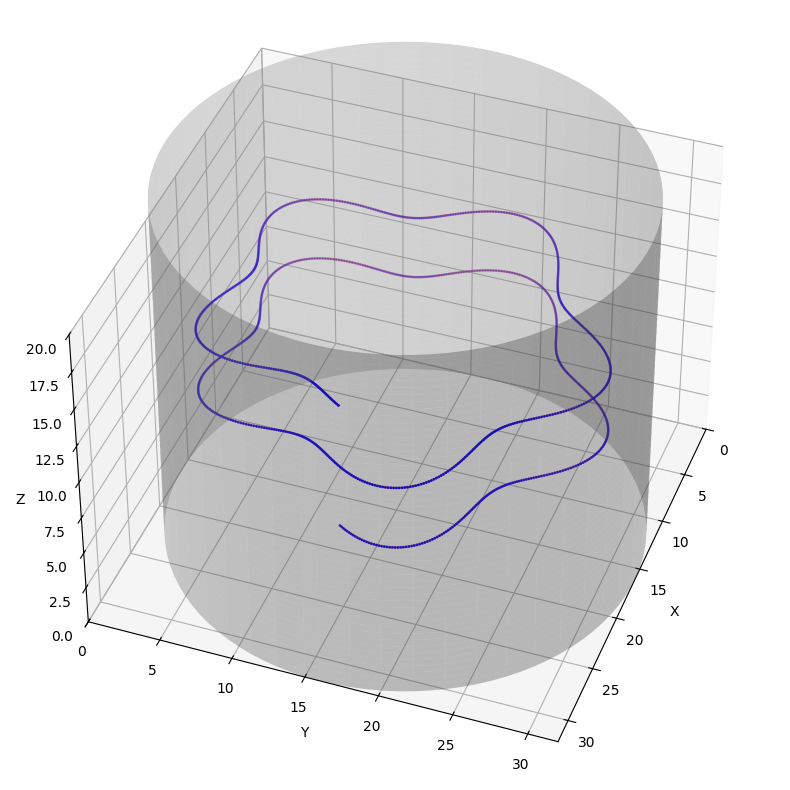

In [6]:
traj_type = "ModulatedHelix"
num_points = 1000
radius = 0.75 * tank.T_r

# Create a single 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create and scale trajectory points
points = create_trajectory_3D(traj_type, radius, num_points)
scaled_points = points.copy()
scaled_points = scaled_points * scale_factor 
scaled_points[:, 0] += 16  
scaled_points[:, 1] += 16

# Create and scale tank mesh
x_tank, y_tank, z_tank = create_cylinder_mesh(tank, n_points=100)
x_tank = x_tank * scale_factor
y_tank = y_tank * scale_factor
z_tank = z_tank * scale_factor
x_tank += 16
y_tank += 16

# Plot tank and trajectory
ax.plot_surface(x_tank, y_tank, z_tank, alpha=0.3, color='gray')
ax.plot(scaled_points[:, 0], scaled_points[:, 1], scaled_points[:, 2], color="red", alpha=0.5)
ax.scatter(scaled_points[:, 0], scaled_points[:, 1], scaled_points[:, 2], color='blue', marker='o', s=1)

# Set view and labels
ax.view_init(elev=40, azim=20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0, 32])
ax.set_ylim([0, 32])
ax.set_zlim([0, 20])

plt.tight_layout()
plt.show()